# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Ziyad Muhammad Adzin Azzufari
- Email: ziyad.azzufari@gmail.com
- Id Dicoding: ziyad_azzufari

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [ ]:
data = pd.read_csv('employee_data.csv')
data

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


In [2]:
data.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
# Melihat jumlah nilai unik di setiap kolom
unique_values = data.nunique().sort_values(ascending=False)
unique_values

EmployeeId                  1470
MonthlyRate                 1427
MonthlyIncome               1349
DailyRate                    886
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                37
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
JobLevel                       5
Education                      5
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
WorkLifeBalance                4
EnvironmentSatisfaction        4
RelationshipSatisfaction       4
BusinessTravel                 3
Department                     3
MaritalStatus                  3
PerformanceRating              2
OverTime                       2
Attrition 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
# Filter kolom bertipe kategori dan menampilkan nilai unik
categorical_columns = data.select_dtypes(include='object').columns
unique_categories = {col: data[col].unique() for col in categorical_columns}
# Menampilkan nilai unik kolom kategori dalam format yang rapi
for col, values in unique_categories.items():
    print(f"### {col}")
    for value in values:
        print(f"- {value}")
    print("\n")  # Menambahkan baris kosong untuk memisahkan antar kolom

### BusinessTravel
- Travel_Frequently
- Travel_Rarely
- Non-Travel


### Department
- Human Resources
- Research & Development
- Sales


### EducationField
- Other
- Medical
- Life Sciences
- Marketing
- Technical Degree
- Human Resources


### Gender
- Male
- Female


### JobRole
- Human Resources
- Healthcare Representative
- Research Scientist
- Sales Executive
- Manager
- Laboratory Technician
- Research Director
- Manufacturing Director
- Sales Representative


### MaritalStatus
- Married
- Single
- Divorced


### Over18
- Y


### OverTime
- Yes
- No




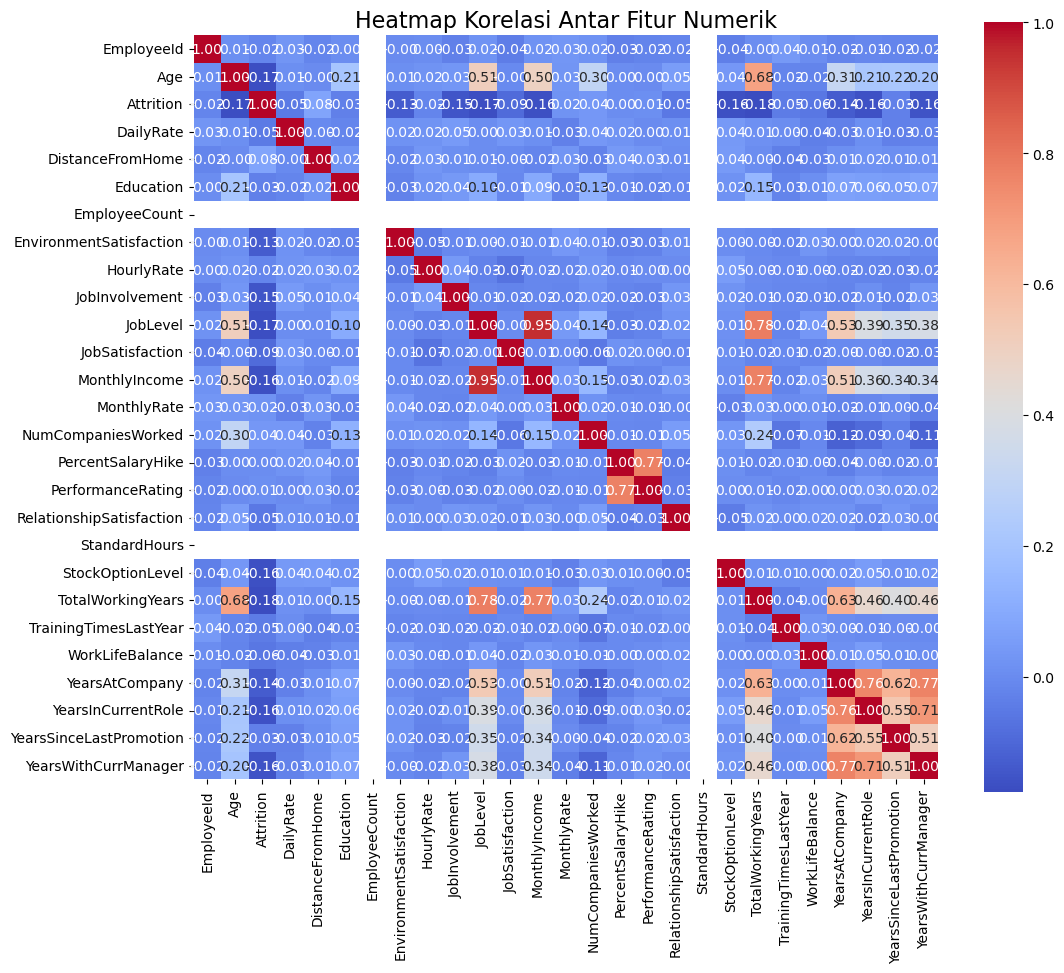

In [ ]:
# Menghitung matriks korelasi untuk kolom numerik saja
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Heatmap Korelasi Antar Fitur Numerik", fontsize=16)
plt.show()

In [7]:
data.isnull().sum().sort_values(ascending=False)

Attrition                   412
EmployeeId                    0
StandardHours                 0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
MonthlyIncome                 0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
MonthlyRate                   0
MaritalStatus                 0
Age                           0
JobSatisfaction               0
JobRole                       0
JobLevel                      0
JobInvolvement                0
HourlyRate                    0
Gender                        0
EnvironmentSatisfaction       0
EmployeeCount                 0
EducationField                0
Education                     0
DistanceFromHome              0
Departme

In [8]:
data.duplicated().sum()

0

## Data Preparation / Preprocessing

In [9]:
data.dropna(inplace=True)

In [10]:
data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [11]:
data

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,3,1,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,3,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,3,4,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,2,...,4,3,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,4,...,3,4,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,2,...,3,1,0,10,2,2,10,7,1,9
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,...,3,4,0,10,4,4,1,0,0,0
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,...,3,4,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,...,3,2,1,6,0,3,4,2,0,0


In [12]:
# Mengubah nilai kolom 'Attrition' dari 0 dan 1 menjadi 'Yes' dan 'No'
if 'Attrition' in data.columns:
    data['Attrition'] = data['Attrition'].replace({1: 'Yes', 0: 'No'})
    print(data['Attrition'].unique())  # Verifikasi hasil
else:
    print("Kolom 'Attrition' tidak ditemukan dalam dataset.")

['Yes' 'No']


In [13]:
# Define mapping dictionaries
education_mapping = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
satisfaction_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_mapping = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
worklife_mapping = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}

# Apply mappings to corresponding columns
data['Education'] = data['Education'].map(education_mapping).astype('category')
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].map(satisfaction_mapping).astype('category')
data['JobInvolvement'] = data['JobInvolvement'].map(satisfaction_mapping).astype('category')
data['JobSatisfaction'] = data['JobSatisfaction'].map(satisfaction_mapping).astype('category')
data['PerformanceRating'] = data['PerformanceRating'].map(performance_mapping).astype('category')
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].map(satisfaction_mapping).astype('category')
data['WorkLifeBalance'] = data['WorkLifeBalance'].map(worklife_mapping).astype('category')
data

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Excellent,Low,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,Excellent,High,3,18,2,Outstanding,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Excellent,Very High,1,23,2,Outstanding,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,Outstanding,High,3,6,2,Good,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Excellent,Very High,1,24,2,Excellent,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,...,Excellent,Low,0,10,2,Good,10,7,1,9
1465,1466,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,...,Excellent,Very High,0,10,4,Outstanding,1,0,0,0
1467,1468,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,...,Excellent,Very High,0,1,4,Good,1,1,0,0
1468,1469,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,High,...,Excellent,Medium,1,6,0,Excellent,4,2,0,0


In [14]:
# Kolom yang akan diubah menjadi kategorikal
categorical_columns = [
    'Attrition', 
    'BusinessTravel', 
    'Department', 
    'EducationField', 
    'Gender', 
    'JobRole', 
    'MaritalStatus', 
    'OverTime'
]

# Ubah setiap kolom dalam daftar menjadi kategorikal
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [15]:
data.describe(include='category').T

,count,unique,top,freq
Attrition,1058,2,No,879
BusinessTravel,1058,3,Travel_Rarely,746
Department,1058,3,Research & Development,701
Education,1058,5,Bachelor,410
EducationField,1058,6,Life Sciences,436
EnvironmentSatisfaction,1058,4,High,335
Gender,1058,2,Male,620
JobInvolvement,1058,4,High,625
JobRole,1058,9,Sales Executive,232
JobSatisfaction,1058,4,Very High,340


In [16]:
data.describe(exclude='category').T

,count,mean,std,min,25%,50%,75%,max
EmployeeId,1058.0,736.656900,427.440538,2.0,364.25,731.5,1117.75,1470.0
Age,1058.0,37.055766,9.410421,18.0,30.00,36.0,43.00,60.0
DailyRate,1058.0,809.542533,408.478049,102.0,465.25,817.5,1168.50,1499.0
DistanceFromHome,1058.0,8.978261,8.040608,1.0,2.00,7.0,13.00,29.0
HourlyRate,1058.0,65.643667,20.324861,30.0,48.00,65.0,83.00,100.0
JobLevel,1058.0,2.090737,1.136514,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,1058.0,6625.945180,4837.695042,1009.0,2900.25,4903.5,8736.50,19999.0
MonthlyRate,1058.0,14267.281664,7048.077305,2094.0,8277.25,14201.0,20364.00,26999.0
NumCompaniesWorked,1058.0,2.706994,2.523526,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1058.0,15.155955,3.641097,11.0,12.00,14.0,18.00,25.0


In [17]:
data.Attrition.value_counts()

Attrition
No     879
Yes    179
Name: count, dtype: int64

In [18]:
data.BusinessTravel.value_counts

<bound method IndexOpsMixin.value_counts of 1           Travel_Rarely
2           Travel_Rarely
3       Travel_Frequently
6           Travel_Rarely
7           Travel_Rarely
              ...        
1464           Non-Travel
1465        Travel_Rarely
1467        Travel_Rarely
1468           Non-Travel
1469    Travel_Frequently
Name: BusinessTravel, Length: 1058, dtype: category
Categories (3, object): ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']>

In [19]:
data.Department.value_counts()

Department
Research & Development    701
Sales                     319
Human Resources            38
Name: count, dtype: int64

In [20]:
data.EducationField.value_counts()

EducationField
Life Sciences       436
Medical             330
Marketing           122
Technical Degree     96
Other                59
Human Resources      15
Name: count, dtype: int64

In [21]:
data.Gender.value_counts()

Gender
Male      620
Female    438
Name: count, dtype: int64

In [22]:
data.JobRole.value_counts()

JobRole
Sales Executive              232
Research Scientist           214
Laboratory Technician        188
Manufacturing Director       107
Healthcare Representative     88
Manager                       79
Research Director             62
Sales Representative          58
Human Resources               30
Name: count, dtype: int64

In [23]:
data.MaritalStatus.value_counts()

MaritalStatus
Married     464
Single      352
Divorced    242
Name: count, dtype: int64

In [24]:
data.OverTime.value_counts()

OverTime
No     751
Yes    307
Name: count, dtype: int64

In [25]:
# Menghitung jumlah karyawan berdasarkan kolom 'EmployeeId'
total_employees = data['EmployeeId'].nunique()

# Menampilkan hasil
print(f'Jumlah karywan: {total_employees}')

Jumlah karywan: 1058


In [ ]:
# Menghitung jumlah karyawan berdasarkan 'Attrition' (Aktif vs Keluar)
attrition_comparison = data['Attrition'].value_counts().reset_index()
attrition_comparison.columns = ['Attrition', 'Count']

# Membuat grafik batang interaktif menggunakan Plotly
fig = px.bar(attrition_comparison, 
             x='Attrition', 
             y='Count', 
             color='Attrition', 
             color_discrete_map={'Yes': '#FF6347', 'No': '#4682B4'}, 
             labels={'Attrition': 'Attrition Status', 'Count': 'Number of Employees'},
             title="Perbandingan Karyawan Aktif dan Keluar")

# Menampilkan grafik
fig.show()

Hasil pada bar chart diatas menunjukan bahwa karyawan aktif sebesar 879 dan karyawan yang keluar sebesar 179. Nilai attrition ratenya sebesar 179/(179+879)

In [27]:
# Menghitung jumlah 'Attrition' berdasarkan 'Gender'
attrition_gender = data.groupby(['Gender', 'Attrition']).size().reset_index(name='Count')

# Membuat grafik batang interaktif menggunakan Plotly
fig = px.bar(attrition_gender, 
             x='Gender', 
             y='Count', 
             color='Attrition', 
             barmode='group', 
             color_discrete_map={'Yes': '#FF6347', 'No': '#4682B4'}, 
             labels={'Attrition': 'Attrition Status', 'Count': 'Count'},
             title="Karyawan yang Keluar Berdasarkan Gender")

# Menampilkan grafik
fig.show()

Hasil dari bar chart diatas untuk karyawan yang keluar berdasarkan gender paling banyak adalah laki-laki sebesar 108.

In [28]:
# Menghitung jumlah 'Attrition' berdasarkan 'BusinessTravel'
attrition_business_travel = data.groupby(['BusinessTravel', 'Attrition']).size().reset_index(name='Count')

# Membuat grafik batang interaktif menggunakan Plotly
fig = px.bar(attrition_business_travel, 
             x='BusinessTravel', 
             y='Count', 
             color='Attrition', 
             barmode='group', 
             color_discrete_map={'Yes': '#FF6347', 'No': '#4682B4'}, 
             labels={'Attrition': 'Attrition Status', 'Count': 'Count'},
             title="Attrition by Business Travel")

# Menampilkan grafik
fig.show()


Hasil dari bar chart diatas menunjukan bahwa karyawan yang keluar adalah karyawan yang jarang melakukan travel.

In [ ]:
# Membuat histogram untuk DistanceFromHome pada karyawan yang keluar (Attrition = Yes)
fig_yes = px.histogram(data[data['Attrition'] == 'Yes'], 
                       x="DistanceFromHome", 
                       color="Attrition", 
                       barmode="overlay", 
                       color_discrete_map={"Yes": "#FF6347"},
                       title="Effect of Distance From Home on Attrition (Yes)", 
                       labels={"DistanceFromHome": "Distance From Home"})

# Membuat histogram untuk DistanceFromHome pada karyawan yang tetap (Attrition = No)
fig_no = px.histogram(data[data['Attrition'] == 'No'], 
                      x="DistanceFromHome", 
                      color="Attrition", 
                      barmode="overlay", 
                      color_discrete_map={"No": "#4682B4"},
                      title="Effect of Distance From Home on Attrition (No)", 
                      labels={"DistanceFromHome": "Distance From Home"})

# Menampilkan grafik untuk karyawan yang keluar dan yang tetap
fig_yes.show()
fig_no.show()


Hasil historgram diatas, karyawan yang keluar adalah yang jarak dari rumah ke kantornya adalah 0-4 km.

In [30]:
# Menghitung jumlah karyawan berdasarkan department dan attrition
attrition_comparison = data.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

# Membuat bar chart interaktif untuk perbandingan attrition (Yes/No) per department
fig = px.bar(attrition_comparison, 
             x='Department', 
             y='Count', 
             color='Attrition', 
             barmode='group', 
             title="Attrition Comparison by Department", 
             labels={"Count": "Number of Employees", "Department": "Department", "Attrition": "Attrition Status"},
             color_discrete_map={"Yes": "#FF6347", "No": "#4682B4"})

# Menampilkan grafik interaktif
fig.show()

Hasil dari bar chart diatas, karyawan yang banyak keluar berasal dari departemnt RnD

In [31]:
# Menghitung jumlah karyawan yang keluar (Attrition = 'Yes') berdasarkan JobRole
attrition_yes_count = data[data['Attrition'] == 'Yes'].groupby('JobRole').size().reset_index(name='Attrition Count')

# Membuat bar chart horizontal
fig = px.bar(attrition_yes_count, 
             x='Attrition Count', 
             y='JobRole', 
             orientation='h', 
             title='Attrition Count by Job Role',
             labels={'Attrition Count': 'Number of Attrition', 'JobRole': 'Job Role'}
             )

# Menampilkan grafik interaktif
fig.show()

Dari grafik diatas, banyaknya karyawan yang keluar adalah dengan Job role Laboratory Tecnician

In [32]:
# Membuat histogram untuk melihat distribusi umur berdasarkan status Attrition
fig = px.histogram(data, 
                   x='Age', 
                   color='Attrition', 
                   barmode='overlay', 
                   title='Age Distribution by Attrition Status',
                   labels={'Attrition': 'Attrition', 'Age': 'Age'},
                   color_discrete_map={'Yes': '#FF6347', 'No': '#4682B4'})

# Menampilkan grafik
fig.show()

Hasil diatas merupakan Histogram dari Usia karyawan yang keluar dan aktif. Berdasarkan grafik tersebut karyawan yang banyak keluar terdapat pada range usia 28-29.

In [33]:
# Rata-rata gaji berdasarkan status Attrition
salary_summary = data.groupby('Attrition')['MonthlyIncome'].describe()
salary_summary

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,879.0,6982.928328,4947.913587,1051.0,3202.5,5210.0,9407.5,19999.0
Yes,179.0,4872.938547,3807.243146,1009.0,2391.5,3388.0,5872.0,19859.0


In [34]:
# Membuat histogram untuk MonthlyIncome berdasarkan Attrition
fig = px.histogram(data, 
                   x='MonthlyIncome', 
                   color='Attrition', 
                   barmode='overlay',
                   title="Monthly Income Distribution by Attrition Status",
                   labels={'Attrition': 'Attrition', 'MonthlyIncome': 'Monthly Income'},
                   color_discrete_map={'Yes': '#FF6347', 'No': '#4682B4'})

fig.show()

Grafik diatas adalah sebaran pendapatan bulanan pada karyawan yang keluar dan aktif. Berdasarkan grafik tersebut, karyawn yang keluar adalah karyawan yang mendapatkan pendapatan bulanan disekitaran 2000-2999.

In [ ]:
# Perform t-test
income_yes = data[data['Attrition'] == 'Yes']['MonthlyIncome']
income_no = data[data['Attrition'] == 'No']['MonthlyIncome']
t_stat, p_value = ttest_ind(income_yes, income_no)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -5.38896741824991, P-Value: 8.737540415690717e-08


In [36]:
# Membuat scatter plot interaktif dengan Plotly
fig = px.scatter(data, 
                 x='MonthlyIncome', 
                 y='HourlyRate', 
                 color='Attrition', 
                 symbol='Department', 
                 title="Relationship between Monthly Income and Hourly Rate by Attrition Status and Department",
                 labels={'MonthlyIncome': 'Monthly Income', 'HourlyRate': 'Hourly Rate'})

# Menampilkan plot interaktif
fig.show()

Grafik tersebut merupakan scatter plot untuk melihat sebaran data pada pendapatan bulanan dengan rate perjamnya di tiap department untuk karyawan aktif dan keluar. Karyawan dengan pendapatan bulanan terendah dan rate per jam terendah untuk karyawan yang keluar ada pada department RnD.

In [ ]:
# Menghitung jumlah attrition untuk setiap EducationField
attrition_by_education = data.groupby(['EducationField', 'Attrition']).size().reset_index(name='Count')

# Menambahkan kolom untuk menghitung attrition rate
attrition_by_education['Total'] = attrition_by_education.groupby('EducationField')['Count'].transform('sum')
attrition_by_education['AttritionRate'] = attrition_by_education['Count'] / attrition_by_education['Total']

# Memfilter hanya untuk Attrition = Yes
attrition_yes = attrition_by_education[attrition_by_education['Attrition'] == 'Yes']

# Membuat bar chart interaktif dengan Plotly
fig = px.bar(attrition_yes, 
             x='EducationField', 
             y='AttritionRate', 
             color='EducationField', 
             title='Attrition Rate by Education Field',
             labels={'AttritionRate': 'Attrition Rate', 'EducationField': 'Education Field'},
             color_discrete_map={
                 'Life Sciences': '#FF6347', 
                 'Other': '#4682B4', 
                 'Medical': '#FFD700', 
                 'Marketing': '#32CD32', 
                 'Technical Degree': '#8A2BE2', 
                 'Human Resources': '#FF4500'
             })

# Menampilkan plot interaktif
fig.show()

Bar Chart diatas menampilkan attrition rate pada bidang edukasi apa seorang karyawan yang keluar. Hasilnya menunjukan bahwa attrition rate tertinggi didapat pada Tecnical Degree.

In [38]:
# Menghitung jumlah karyawan berdasarkan OverTime dan Attrition
attrition_overtime = data.groupby(['OverTime', 'Attrition']).size().reset_index(name='Count')

# Menambahkan kolom untuk menghitung attrition rate
attrition_overtime['Total'] = attrition_overtime.groupby('OverTime')['Count'].transform('sum')
attrition_overtime['AttritionRate'] = attrition_overtime['Count'] / attrition_overtime['Total']

# Memfilter hanya untuk Attrition = Yes
attrition_yes_overtime = attrition_overtime[attrition_overtime['Attrition'] == 'Yes']

# Membuat bar chart interaktif untuk melihat attrition rate berdasarkan OverTime
fig = px.bar(attrition_yes_overtime, 
             x='OverTime', 
             y='AttritionRate', 
             color='OverTime', 
             title='Attrition Rate by Overtime Status',
             labels={'AttritionRate': 'Attrition Rate', 'OverTime': 'Overtime Status'},
             color_discrete_map={'Yes': '#FF6347', 'No': '#4682B4'})

# Menampilkan grafik interaktif
fig.show()

Bar Chart diatas menunjukan attrition rate dengan orang yang bekerja melebihi jam kerja (overtime). Hasilnya menunjukan bahwa karyawan yang keluar dipengaruhi oleh jam kerja yang berlebih.

In [39]:
attrition_overtime

,OverTime,Attrition,Count,Total,AttritionRate
0,No,No,670,751,0.892144
1,No,Yes,81,751,0.107856
2,Yes,No,209,307,0.680782
3,Yes,Yes,98,307,0.319218


In [40]:
# Calculate attrition rates for each work-life balance category
work_life_attrition_rate = data.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
work_life_attrition_rate = work_life_attrition_rate['Yes']  # Focus on attrition ('Yes')

# Creating a bar plot to show attrition rate by work-life balance
fig = px.bar(work_life_attrition_rate,
             x=work_life_attrition_rate.index,
             y=work_life_attrition_rate.values,
             labels={'x': 'Work Life Balance', 'y': 'Attrition Rate'},
             title="Attrition Rate by Work-Life Balance")
fig.show()

Grafik diatas menampilkan attrition rate dengan work life balance pada karyawan yang keluar. Hasil yang didapat adalah karyawan yang keluar mendapatkan work life balance yang rendah dengan attrition rate tertinggi.

In [41]:
# Grouping the data based on 'OverTime' and 'Attrition'
overtime_attrition = data.groupby(['OverTime', 'Attrition']).size().reset_index(name='Count')

# Creating an interactive bar chart to visualize attrition based on overtime status
fig = px.bar(overtime_attrition,
             x='OverTime',
             y='Count',
             color='Attrition',
             title="Attrition Based on Overtime",
             labels={'OverTime': 'Overtime', 'Attrition': 'Attrition', 'Count': 'Count'},
             color_discrete_map={'Yes': '#FF6347', 'No': '#4682B4'},
             barmode='group')

# Show the plot
fig.show()

Bar chart diatas menampilkan karyawan yang keluar dan aktif dengan overtime. Karyawan yang keluar didominasi oleh karyawan yang mendapatkan jam kerja berlebih. 

In [42]:
# Calculate attrition rate for each environment satisfaction level
env_satisfaction_attrition_rate = data.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
env_satisfaction_attrition_rate = env_satisfaction_attrition_rate['Yes']  # Focus on 'Yes' for attrition

# Creating a bar plot to show attrition rate by environment satisfaction
fig = px.bar(env_satisfaction_attrition_rate,
             x=env_satisfaction_attrition_rate.index,
             y=env_satisfaction_attrition_rate.values,
             labels={'x': 'Environment Satisfaction', 'y': 'Attrition Rate'},
             title="Attrition Rate by Environment Satisfaction"
             )

fig.show()

Hasil diatas adalah karywan yang keluar dengan kepuasan lingkungan. Hasil tertinggi adalah karyawan yang keluar yang mendapatkan kepuasan lingkung terendah dengan attrition rate 0,27.

In [43]:
# Calculate attrition rate for each job satisfaction level
job_satisfaction_attrition_rate = data.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
job_satisfaction_attrition_rate = job_satisfaction_attrition_rate['Yes']  # Focus on 'Yes' for attrition

# Creating a bar plot to show attrition rate by job satisfaction
fig = px.bar(job_satisfaction_attrition_rate,
             x=job_satisfaction_attrition_rate.index,
             y=job_satisfaction_attrition_rate.values,
             labels={'x': 'Job Satisfaction', 'y': 'Attrition Rate'},
             title="Attrition Rate by Job Satisfaction")

fig.show()

Attrition rate tertinggi didapat pada karyawan yang keluar pada kepuasan pekerjaan terendah, yaitu sebesar 0,22.

In [44]:
# Create a histogram to show the distribution of years of experience for employees who left (Attrition = 'Yes') and stayed (Attrition = 'No')
fig = px.histogram(data, 
                   x='YearsAtCompany', 
                   color='Attrition', 
                   barmode='overlay',  # Overlay bars for easier comparison
                   title="Distribution of Work Experience by Attrition",
                   labels={'YearsAtCompany': 'Years at Company', 'Attrition': 'Attrition'},
                   color_discrete_map={'Yes': '#FF6347', 'No': '#4682B4'},
                   nbins=15,  # You can adjust the number of bins for better granularity
                   histfunc='count')  # This shows raw count (not percentage)

# Show the plot
fig.show()

Hasil diatas adalah distribusi dari karyawan aktif dan keluar dengan lamanya bekerja dalam tahun di perusahaan. Hasilnya karyawan yang keluar adalah karyawan dengan lama bekerja dari 0-4 tahun di perusahaan. 

In [45]:
# Group employees by TotalWorkingYears and calculate the count of 'Yes' and 'No' for Attrition
attrition_comparison = data.groupby(['TotalWorkingYears', 'Attrition']).size().unstack().fillna(0)

# Creating a line plot to show attrition comparison by work experience
fig = px.line(attrition_comparison,
              x=attrition_comparison.index,
              y=['Yes', 'No'],
              labels={'TotalWorkingYears': 'Total Working Years', 'value': 'Count'},
              title="Attrition Comparison by Work Experience (Total Working Years)",
              markers=True)

fig.show()

Hasil diatas merupakan perbandingan antara karyawan aktif dengan karywan keluar berdasarkan pengalaman kerja. Didapatkan bahwa hasilnya adalah karyawan yang keluar adalah karyawan yang memiliki pengalaman kerja 1 tahun.

In [55]:
# Calculate attrition counts for each education level
attrition_counts_education = data.groupby('Education')['Attrition'].value_counts().unstack().fillna(0)

# Create a bar plot with separate bars for each 'Yes' and 'No' attrition status
fig = px.bar(attrition_counts_education,
             x=attrition_counts_education.index,
             y=['Yes', 'No'],
             labels={'Education': 'Education Level', 'value': 'Count', 'variable': 'Attrition'},
             title="Attrition Count by Education Level",
             color='variable',
             color_discrete_map={'Yes': '#FF6347', 'No': '#4682B4'},
             barmode='group')  # Grouped bars instead of stacked

fig.show()

Hasil diatas merupakan perbandingan antara karyawan aktif dengan karyawan yang keluar pada education level. Hasilnya adalah karyawan yang keluar adalah karyawan yang memiliki tingkat edukasi sarjana.

In [53]:
data.to_csv('employee.csv', index=False)

## Modeling

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeId                1058 non-null   int64   
 1   Age                       1058 non-null   int64   
 2   Attrition                 1058 non-null   category
 3   BusinessTravel            1058 non-null   category
 4   DailyRate                 1058 non-null   int64   
 5   Department                1058 non-null   category
 6   DistanceFromHome          1058 non-null   int64   
 7   Education                 1058 non-null   category
 8   EducationField            1058 non-null   category
 9   EnvironmentSatisfaction   1058 non-null   category
 10  Gender                    1058 non-null   category
 11  HourlyRate                1058 non-null   int64   
 12  JobInvolvement            1058 non-null   category
 13  JobLevel                  1058 non-null   int64   
 1

In [ ]:
data.drop(columns='EmployeeId',inplace=True)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,1,2,1141,1,11,2,3,1,0,...,3,1,0,15,2,1,1,0,0,0
2,51,1,2,1323,1,4,4,1,1,1,...,3,3,3,18,2,4,10,0,2,7
3,42,0,1,555,2,26,3,2,3,0,...,3,4,1,23,2,4,20,4,4,8
6,40,0,2,1124,2,1,2,3,2,1,...,4,3,3,6,2,2,4,3,0,2
7,55,1,2,725,1,2,3,3,4,1,...,3,4,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,1,0,1366,1,24,2,5,2,1,...,3,1,0,10,2,2,10,7,1,9
1465,38,0,2,168,1,1,3,1,3,0,...,3,4,0,10,4,4,1,0,0,0
1467,28,1,2,1485,1,12,1,1,3,0,...,3,4,0,1,4,2,1,1,0,0
1468,40,0,0,458,1,16,2,1,3,1,...,3,2,1,6,0,3,4,2,0,0


In [57]:
# Mapping metadata untuk mengubah kategori menjadi numerik
mapping_metadata_to_numeric = {
    "Attrition": {"No": 0, "Yes": 1},
    "Education": {"Below College": 1, "College": 2, "Bachelor": 3, "Master": 4, "Doctor": 5},
    "EnvironmentSatisfaction": {"Low": 1, "Medium": 2, "High": 3, "Very High": 4},
    "JobInvolvement": {"Low": 1, "Medium": 2, "High": 3, "Very High": 4},
    "JobSatisfaction": {"Low": 1, "Medium": 2, "High": 3, "Very High": 4},
    "PerformanceRating": {"Low": 1, "Good": 2, "Excellent": 3, "Outstanding": 4},
    "RelationshipSatisfaction": {"Low": 1, "Medium": 2, "High": 3, "Very High": 4},
    "WorkLifeBalance": {"Low": 1, "Good": 2, "Excellent": 3, "Outstanding": 4}
}

# Konversi kategori menjadi numerik
for col, mapping in mapping_metadata_to_numeric.items():
    if col in data.columns:
        data[col] = data[col].map(mapping).astype("int")

# Periksa tipe data setelah konversi
data


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,3,1,0,15,2,1,1,0,0,0
2,3,51,1,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,3,3,18,2,4,10,0,2,7
3,4,42,0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,3,4,1,23,2,4,20,4,4,8
6,7,40,0,Travel_Rarely,1124,Sales,1,2,Medical,2,...,4,3,3,6,2,2,4,3,0,2
7,8,55,1,Travel_Rarely,725,Research & Development,2,3,Medical,4,...,3,4,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1,Non-Travel,1366,Research & Development,24,2,Technical Degree,2,...,3,1,0,10,2,2,10,7,1,9
1465,1466,38,0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,...,3,4,0,10,4,4,1,0,0,0
1467,1468,28,1,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,...,3,4,0,1,4,2,1,1,0,0
1468,1469,40,0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,...,3,2,1,6,0,3,4,2,0,0


In [ ]:
columns = ['BusinessTravel', 
    'Department', 
    'EducationField', 
    'Gender', 
    'JobRole', 
    'MaritalStatus', 
    'OverTime']

# Inisialisasi LabelEncoder
label_encoders = {}

# Proses encoding untuk setiap kolom
for col in columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le  # Simpan encoder untuk referensi di masa depan

# Periksa data setelah transformasi
data

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1,2,1141,1,11,2,3,1,...,3,1,0,15,2,1,1,0,0,0
2,3,51,1,2,1323,1,4,4,1,1,...,3,3,3,18,2,4,10,0,2,7
3,4,42,0,1,555,2,26,3,2,3,...,3,4,1,23,2,4,20,4,4,8
6,7,40,0,2,1124,2,1,2,3,2,...,4,3,3,6,2,2,4,3,0,2
7,8,55,1,2,725,1,2,3,3,4,...,3,4,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1,0,1366,1,24,2,5,2,...,3,1,0,10,2,2,10,7,1,9
1465,1466,38,0,2,168,1,1,3,1,3,...,3,4,0,10,4,4,1,0,0,0
1467,1468,28,1,2,1485,1,12,1,1,3,...,3,4,0,1,4,2,1,1,0,0
1468,1469,40,0,0,458,1,16,2,1,3,...,3,2,1,6,0,3,4,2,0,0


In [65]:
x = data.drop('Attrition',axis=1)
y = data['Attrition']

In [ ]:
#split data into train and test set.
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
# Inisialisasi scaler
scaler = MinMaxScaler()

# Fit scaler pada data training dan transformasi
X_train = scaler.fit_transform(X_train)

# Transformasi data testing menggunakan scaler yang sama
X_test = scaler.transform(X_test)

In [79]:
print(X_train.shape)
print(X_test.shape)

(846, 30)
(212, 30)


In [ ]:
boost = AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth=1), n_estimators=500, algorithm='SAMME',learning_rate=0.01)

boost.fit(X_train,y_train)

c:\Users\ziyad\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)

In [98]:
predictions = boost.predict(X_test)

## Evaluation

In [99]:
# Evaluasi model
accuracy = accuracy_score(y_test, predictions)
print(f"Akurasi Model: {accuracy:.2f}")

Akurasi Model: 0.89


In [100]:
# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, predictions))


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       173
           1       0.83      0.49      0.61        39

    accuracy                           0.89       212
   macro avg       0.86      0.73      0.77       212
weighted avg       0.88      0.89      0.87       212



In [101]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

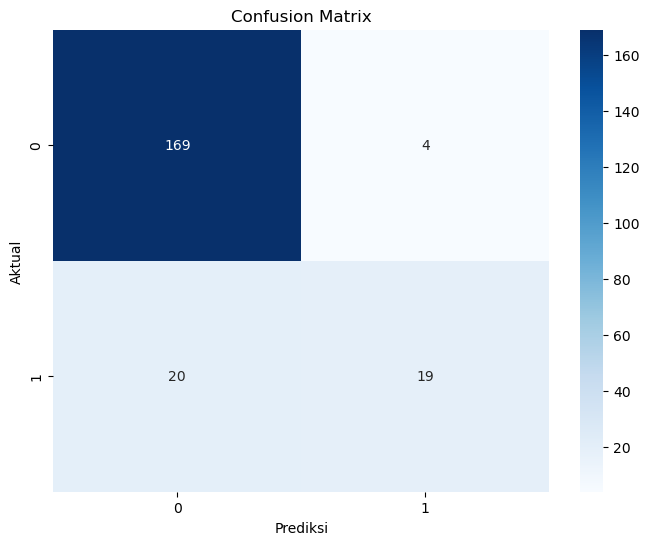

In [102]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [ ]:
# Save the model
joblib.dump(boost, 'adaboost_model.pkl')

print("Model saved successfully!")

Model saved successfully!
